Libraries

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

Initial code with self generated dataset

In [ ]:
# Number of cities
num_cities = 20

# Generate random coordinates for cities
cities = np.random.rand(num_cities, 2) * 120

# Function to calculate the distance matrix between cities
def calculate_distance_matrix(cities):
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            dist_matrix[i][j] = np.linalg.norm(cities[i] - cities[j])
            dist_matrix[j][i] = dist_matrix[i][j]

distance_matrix = calculate_distance_matrix(cities)

In [ ]:
# Create initial population of random routes (with fixed start and end)
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(np.random.permutation(range(2, num_cities)))
        individual = [0] + individual + [1]
        population.append(individual)
    return population

In [ ]:
# Fitness function: inverse of total distance
def calculate_route_distance(individual, distance_matrix):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance_matrix[individual[i], individual[i+1]]
    return total_distance

def fitness(individual, distance_matrix):
    return 1 / calculate_route_distance(individual, distance_matrix)

In [ ]:
# Tournament selection
def tournament_selection(population, distance_matrix, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        tournament.sort(key=lambda x: fitness(x, distance_matrix), reverse=True)
        selected.append(tournament[0])
    return selected

In [ ]:
# Partially Matched Crossover (PMX) for the TSP problem (with fixed start and end)
def pmx_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = np.full(size, -1), np.full(size, -1)

    # Random crossover points (excluding the first and last city)
    cx_point1, cx_point2 = sorted(random.sample(range(1, size - 1), 2))

    # Copy segment from parent1 to child1, parent2 to child2
    child1[cx_point1:cx_point2] = parent1[cx_point1:cx_point2]
    child2[cx_point1:cx_point2] = parent2[cx_point1:cx_point2]

    # Fill child1 with remaining cities from parent2
    def fill_child(child, parent, other_parent):
        for i in range(1, size - 1):
            if child[i] == -1:
                candidate_gene = parent[i]
                while candidate_gene in child:
                    candidate_gene = parent[np.where(other_parent == candidate_gene)[0][0]]
                child[i] = candidate_gene

    fill_child(child1, parent2, parent1)
    fill_child(child2, parent1, parent2)

    # Set fixed start and end cities (A and B)
    child1[0], child1[-1] = 0, 1
    child2[0], child2[-1] = 0, 1

    return child1, child2

In [ ]:
# Swap mutation (with fixed start and end)
def swap_mutation(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        i, j = random.sample(range(1, len(individual) - 1), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual


In [ ]:
# Genetic Algorithm
def genetic_algorithm(pop_size, num_generations, mutation_rate, distance_matrix):
    population = create_initial_population(pop_size, num_cities)
    best_solution = None
    best_distance = float('inf')
    best_distances = []

    for gen in range(num_generations):
        # Selection
        population = tournament_selection(population, distance_matrix)

        # Crossover
        next_generation = []
        for i in range(0, len(population), 2):
            parent1, parent2 = population[i], population[i+1]
            child1, child2 = pmx_crossover(parent1, parent2)
            next_generation.append(child1)
            next_generation.append(child2)

        # Mutation
        next_generation = [swap_mutation(ind, mutation_rate) for ind in next_generation]

        # Evaluate and find the best individual
        for individual in next_generation:
            dist = calculate_route_distance(individual, distance_matrix)
            if dist < best_distance:
                best_distance = dist
                best_solution = individual

        population = next_generation

        best_distances.append(best_distance)
        if gen % 10 == 0:
            print(f"Generation {gen}, Best Distance: {best_distance}")

    return best_solution, best_distance, best_distances


In [ ]:
pop_size = 100
num_generations = 150
mutation_rate = 0.1

best_solution, best_distance, best_distances = genetic_algorithm(pop_size, num_generations, mutation_rate, distance_matrix)

print("Best route found:", best_solution)
print("Best distance:", best_distance)


Generation 0, Best Distance: 981.0456499662903
Generation 10, Best Distance: 746.7019327044508
Generation 20, Best Distance: 589.3776720188878
Generation 30, Best Distance: 583.6286407086582
Generation 40, Best Distance: 583.6286407086582
Generation 50, Best Distance: 580.3894049581897
Generation 60, Best Distance: 580.3894049581897
Generation 70, Best Distance: 580.3894049581897
Generation 80, Best Distance: 580.3894049581897
Generation 90, Best Distance: 580.3894049581897
Generation 100, Best Distance: 580.3894049581897
Generation 110, Best Distance: 577.9785427331415
Generation 120, Best Distance: 577.9785427331415
Generation 130, Best Distance: 577.9785427331415
Generation 140, Best Distance: 577.9785427331415
Best route found: [ 0 12 19 15 13  9 17  4 10 11 14 18  7  8  3  2  6 16  5  1]
Best distance: 577.9785427331415


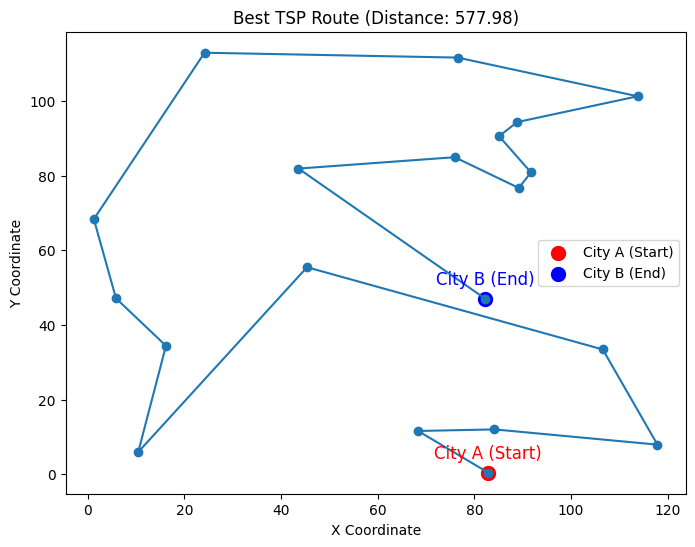

In [ ]:
# Plot the best route with annotations for City A and City B
plt.figure(figsize=(8, 6))
route = best_solution

# Plot the route
plt.plot(cities[route, 0], cities[route, 1], '-o')

# Annotate City A (start) and City B (end)
plt.annotate('City A (Start)', (cities[0, 0], cities[0, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red', fontsize=12)
plt.annotate('City B (End)', (cities[1, 0], cities[1, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='blue', fontsize=12)

plt.scatter(cities[0, 0], cities[0, 1], color='red', s=100, label='City A (Start)')
plt.scatter(cities[1, 0], cities[1, 1], color='blue', s=100, label='City B (End)')

plt.title(f"Best TSP Route (Distance: {best_distance:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Show the plot
plt.legend()
plt.show()


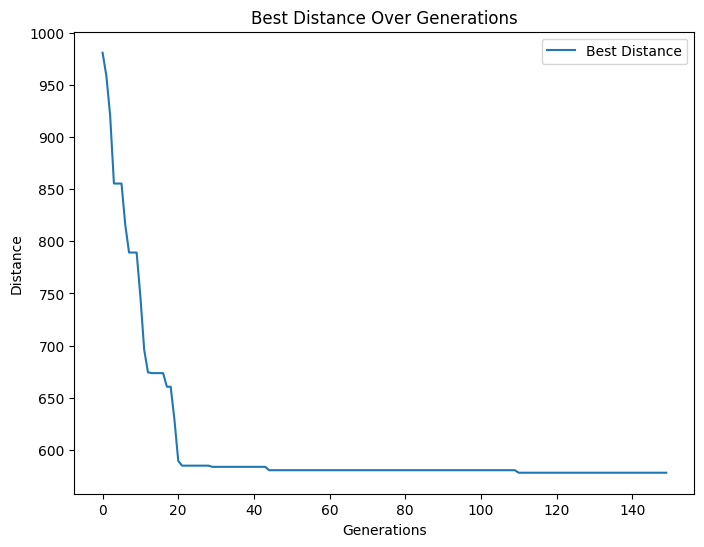

In [ ]:
def plot_best_distance(best_distances):
    plt.figure(figsize=(8, 6))
    plt.plot(best_distances, label="Best Distance")
    plt.xlabel("Generations")
    plt.ylabel("Distance")
    plt.title("Best Distance Over Generations")
    plt.legend()
    plt.show()

plot_best_distance(best_distances)


Generation 0, Best Distance: 914.3889596698439, Diversity: 133.4595072565162
Generation 10, Best Distance: 751.772784993925, Diversity: 71.27194964714224
Generation 20, Best Distance: 681.0373196480441, Diversity: 44.88859176937372
Generation 30, Best Distance: 626.7376904087959, Diversity: 61.129519356155285
Generation 40, Best Distance: 624.980558384133, Diversity: 26.23224847272098
Generation 50, Best Distance: 624.980558384133, Diversity: 67.48605804429283
Generation 60, Best Distance: 623.6564007793854, Diversity: 58.73643420561618
Generation 70, Best Distance: 623.6564007793854, Diversity: 63.06461768592477
Generation 80, Best Distance: 623.6564007793854, Diversity: 39.52498768302438
Generation 90, Best Distance: 623.6564007793854, Diversity: 44.29320342469759
Generation 100, Best Distance: 623.6564007793854, Diversity: 62.72562615411429
Generation 110, Best Distance: 623.6564007793854, Diversity: 50.62519678502176
Generation 120, Best Distance: 623.6564007793854, Diversity: 64.1

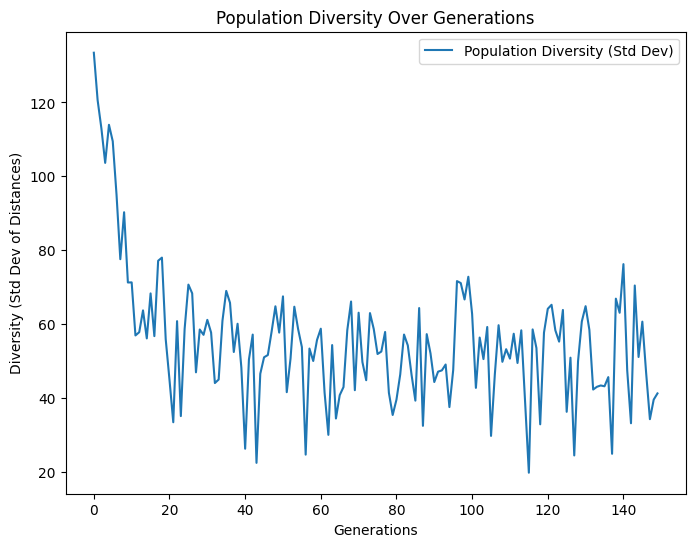

In [ ]:
# Function to calculate population diversity (standard deviation of distances in the population)
def calculate_population_diversity(population, distance_matrix):
    distances = [calculate_route_distance(individual, distance_matrix) for individual in population]
    return np.std(distances)

# Genetic Algorithm with diversity tracking
def genetic_algorithm_with_diversity(pop_size, num_generations, mutation_rate, distance_matrix):
    population = create_initial_population(pop_size, num_cities)
    best_solution = None
    best_distance = float('inf')
    best_distances = []
    population_diversity = []

    for gen in range(num_generations):
        # Selection
        population = tournament_selection(population, distance_matrix)

        # Crossover
        next_generation = []
        for i in range(0, len(population), 2):
            parent1, parent2 = population[i], population[i+1]
            child1, child2 = pmx_crossover(parent1, parent2)
            next_generation.append(child1)
            next_generation.append(child2)

        # Mutation
        next_generation = [swap_mutation(ind, mutation_rate) for ind in next_generation]

        # Evaluate and find the best individual
        for individual in next_generation:
            dist = calculate_route_distance(individual, distance_matrix)
            if dist < best_distance:
                best_distance = dist
                best_solution = individual

        population = next_generation
        best_distances.append(best_distance)
        diversity = calculate_population_diversity(population, distance_matrix)
        population_diversity.append(diversity)

        if gen % 10 == 0:
            print(f"Generation {gen}, Best Distance: {best_distance}, Diversity: {diversity}")

    return best_solution, best_distance, best_distances, population_diversity

best_solution, best_distance, best_distances, population_diversity = genetic_algorithm_with_diversity(pop_size, num_generations, mutation_rate, distance_matrix)

def plot_population_diversity(population_diversity):
    plt.figure(figsize=(8, 6))
    plt.plot(population_diversity, label="Population Diversity (Std Dev)")
    plt.xlabel("Generations")
    plt.ylabel("Diversity (Std Dev of Distances)")
    plt.title("Population Diversity Over Generations")
    plt.legend()
    plt.show()

plot_population_diversity(population_diversity)


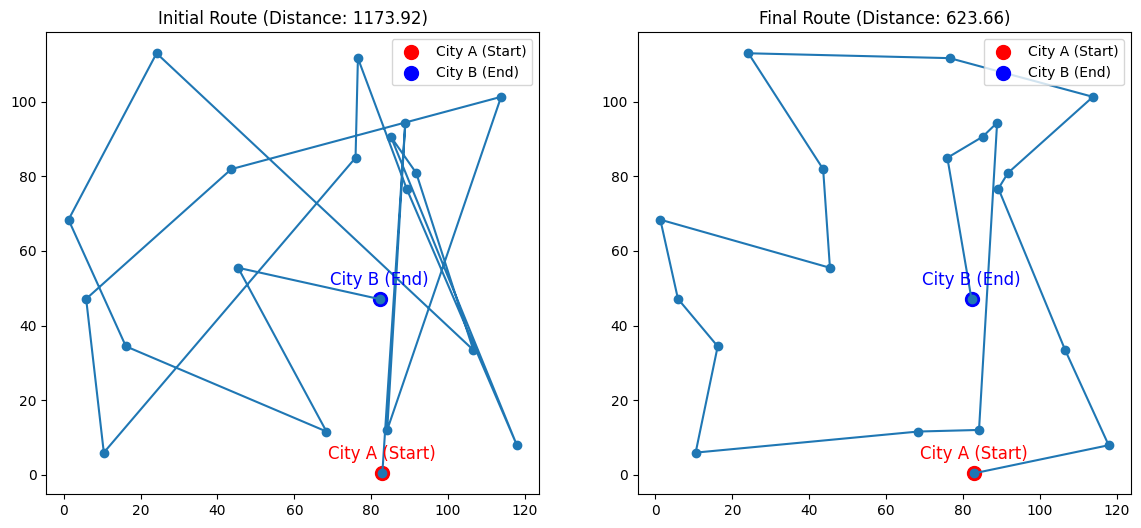

In [ ]:
# Function to plot initial and final routes side-by-side with City A and City B annotated
def plot_comparison_with_annotations(initial_route, final_route, cities, initial_distance, final_distance):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the initial route
    axes[0].plot(cities[initial_route, 0], cities[initial_route, 1], '-o')
    axes[0].set_title(f"Initial Route (Distance: {initial_distance:.2f})")
    axes[0].annotate('City A (Start)', (cities[0, 0], cities[0, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red', fontsize=12)
    axes[0].annotate('City B (End)', (cities[1, 0], cities[1, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='blue', fontsize=12)
    axes[0].scatter(cities[0, 0], cities[0, 1], color='red', s=100, label='City A (Start)')
    axes[0].scatter(cities[1, 0], cities[1, 1], color='blue', s=100, label='City B (End)')
    axes[0].legend()

    # Plot the final route
    axes[1].plot(cities[final_route, 0], cities[final_route, 1], '-o')
    axes[1].set_title(f"Final Route (Distance: {final_distance:.2f})")
    axes[1].annotate('City A (Start)', (cities[0, 0], cities[0, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red', fontsize=12)
    axes[1].annotate('City B (End)', (cities[1, 0], cities[1, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='blue', fontsize=12)
    axes[1].scatter(cities[0, 0], cities[0, 1], color='red', s=100, label='City A (Start)')
    axes[1].scatter(cities[1, 0], cities[1, 1], color='blue', s=100, label='City B (End)')
    axes[1].legend()

    plt.show()

initial_route = create_initial_population(1, num_cities)[0]
initial_distance = calculate_route_distance(initial_route, distance_matrix)

plot_comparison_with_annotations(initial_route, best_solution, cities, initial_distance, best_distance)


Generation 0, Best Distance: 961.9953221316218, Diversity: 114.04743450449338
Generation 10, Best Distance: 758.1239895494257, Diversity: 120.95765414185338
Generation 20, Best Distance: 606.4276451421914, Diversity: 36.45507572695879
Generation 30, Best Distance: 586.1632107057375, Diversity: 2.2117326833841067
Generation 40, Best Distance: 586.1632107057375, Diversity: 24.783848196750398
Generation 50, Best Distance: 586.1632107057375, Diversity: 28.99658228386523
Generation 60, Best Distance: 586.1632107057375, Diversity: 8.067022847037538
Generation 70, Best Distance: 586.1632107057375, Diversity: 0.0
Generation 80, Best Distance: 586.1632107057375, Diversity: 0.0
Generation 90, Best Distance: 586.1632107057375, Diversity: 24.0069243615331
Generation 100, Best Distance: 586.1632107057375, Diversity: 16.12454261533138
Generation 110, Best Distance: 586.1632107057375, Diversity: 1.795290491289529
Generation 120, Best Distance: 586.1632107057375, Diversity: 0.0
Generation 130, Best Di

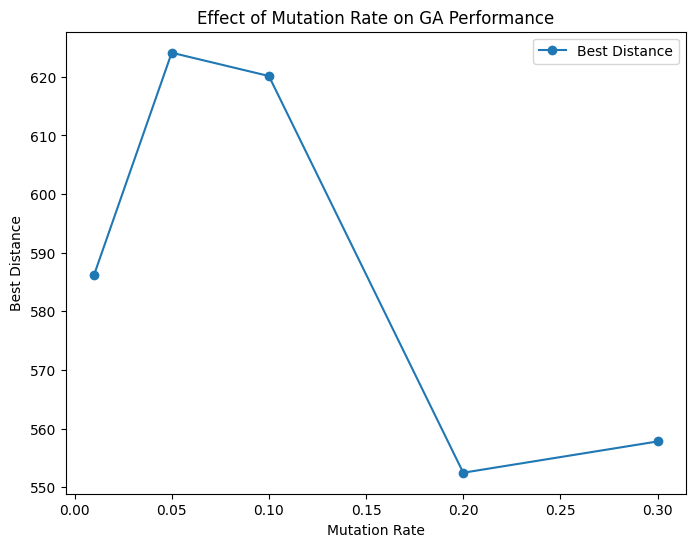

In [ ]:
# Function to run GA with different mutation rates and compare results
def run_ga_with_different_mutation_rates(mutation_rates, pop_size, num_generations, distance_matrix):
    best_distances_for_each_rate = []
    for rate in mutation_rates:
        _, best_distance, _, _ = genetic_algorithm_with_diversity(pop_size, num_generations, rate, distance_matrix)
        best_distances_for_each_rate.append(best_distance)
    return best_distances_for_each_rate

mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

best_distances_for_each_rate = run_ga_with_different_mutation_rates(mutation_rates, pop_size, num_generations, distance_matrix)

def plot_mutation_rate_effect(mutation_rates, best_distances):
    plt.figure(figsize=(8, 6))
    plt.plot(mutation_rates, best_distances, '-o', label="Best Distance")
    plt.xlabel("Mutation Rate")
    plt.ylabel("Best Distance")
    plt.title("Effect of Mutation Rate on GA Performance")
    plt.legend()
    plt.show()

plot_mutation_rate_effect(mutation_rates, best_distances_for_each_rate)


Generation 0, Best Distance: 1038.4749216709515, Diversity: 114.11866725684008
Generation 10, Best Distance: 724.547260409904, Diversity: 93.74801305617862
Generation 20, Best Distance: 656.3138125488255, Diversity: 48.297053066704464
Generation 30, Best Distance: 656.3138125488255, Diversity: 58.80051924233427
Generation 40, Best Distance: 608.693543599827, Diversity: 43.87234916250569
Generation 50, Best Distance: 608.693543599827, Diversity: 64.28692942231415
Generation 60, Best Distance: 603.4675050081249, Diversity: 64.39796687905346
Generation 70, Best Distance: 587.380446073088, Diversity: 48.19211799131705
Generation 80, Best Distance: 587.380446073088, Diversity: 63.30812745664217
Generation 90, Best Distance: 559.6093647102227, Diversity: 69.6113913009428
Generation 100, Best Distance: 559.6093647102227, Diversity: 58.76512787784288
Generation 110, Best Distance: 559.6093647102227, Diversity: 66.83784705908131
Generation 120, Best Distance: 559.6093647102227, Diversity: 73.85

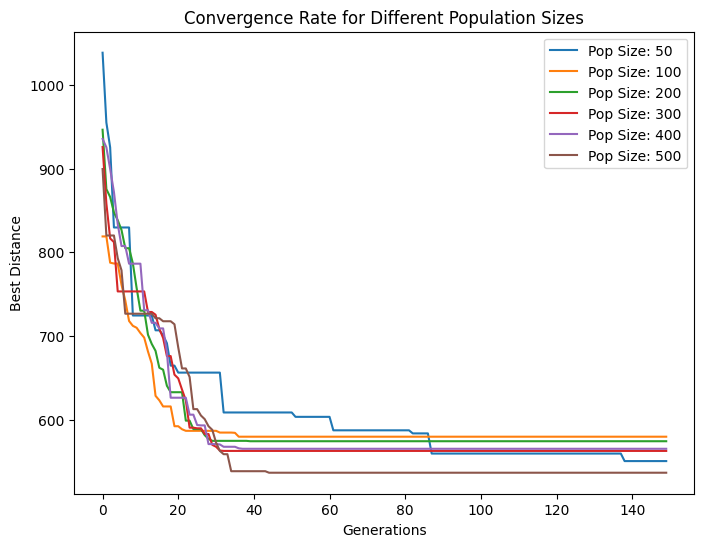

In [ ]:
# Function to run GA with different population sizes
def run_ga_with_different_pop_sizes(pop_sizes, num_generations, mutation_rate, distance_matrix):
    best_distances_for_each_pop = []
    for pop_size in pop_sizes:
        _, _, best_distances, _ = genetic_algorithm_with_diversity(pop_size, num_generations, mutation_rate, distance_matrix)
        best_distances_for_each_pop.append(best_distances)
    return best_distances_for_each_pop

pop_sizes = [50, 100, 200, 300, 400, 500]

best_distances_for_each_pop = run_ga_with_different_pop_sizes(pop_sizes, num_generations, mutation_rate, distance_matrix)

def plot_convergence_rate_for_pop_sizes(pop_sizes, best_distances_for_each_pop):
    plt.figure(figsize=(8, 6))
    for i, pop_size in enumerate(pop_sizes):
        plt.plot(best_distances_for_each_pop[i], label=f"Pop Size: {pop_size}")
    plt.xlabel("Generations")
    plt.ylabel("Best Distance")
    plt.title("Convergence Rate for Different Population Sizes")
    plt.legend()
    plt.show()

plot_convergence_rate_for_pop_sizes(pop_sizes, best_distances_for_each_pop)


In [ ]:
pop_size = 500
num_generations = 300
mutation_rate = 0.2

best_solution, best_distance, best_distances = genetic_algorithm(pop_size, num_generations, mutation_rate, distance_matrix)

print("Best route found:", best_solution)
print("Best distance:", best_distance)


Generation 0, Best Distance: 933.9517837989847
Generation 10, Best Distance: 749.18942976295
Generation 20, Best Distance: 662.6152191633661
Generation 30, Best Distance: 581.9133993048198
Generation 40, Best Distance: 546.9790142864409
Generation 50, Best Distance: 546.9790142864409
Generation 60, Best Distance: 546.9790142864409
Generation 70, Best Distance: 546.9790142864409
Generation 80, Best Distance: 546.9790142864409
Generation 90, Best Distance: 546.9790142864409
Generation 100, Best Distance: 546.9790142864409
Generation 110, Best Distance: 546.9790142864409
Generation 120, Best Distance: 546.9790142864409
Generation 130, Best Distance: 546.9790142864409
Generation 140, Best Distance: 546.9790142864409
Generation 150, Best Distance: 546.9790142864409
Generation 160, Best Distance: 546.9790142864409
Generation 170, Best Distance: 546.9790142864409
Generation 180, Best Distance: 546.9790142864409
Generation 190, Best Distance: 546.9790142864409
Generation 200, Best Distance: 54

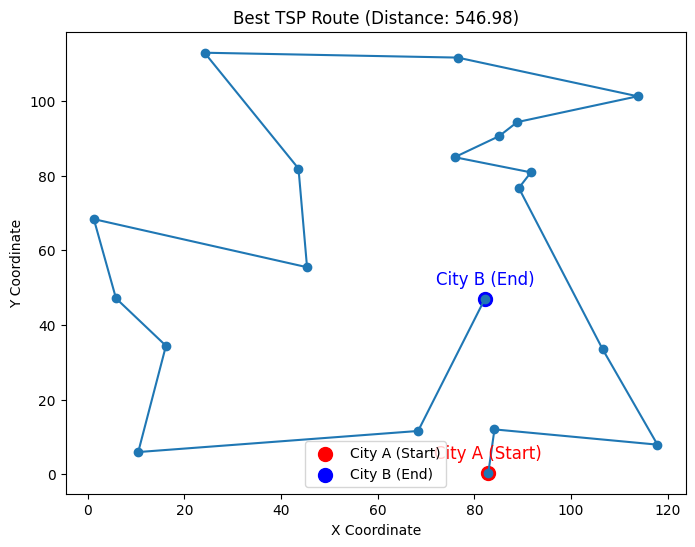

In [ ]:
plt.figure(figsize=(8, 6))
route = best_solution

plt.plot(cities[route, 0], cities[route, 1], '-o')

plt.annotate('City A (Start)', (cities[0, 0], cities[0, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red', fontsize=12)
plt.annotate('City B (End)', (cities[1, 0], cities[1, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='blue', fontsize=12)

plt.scatter(cities[0, 0], cities[0, 1], color='red', s=100, label='City A (Start)')
plt.scatter(cities[1, 0], cities[1, 1], color='blue', s=100, label='City B (End)')

plt.title(f"Best TSP Route (Distance: {best_distance:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.legend()
plt.show()


GA on TSP Datasets

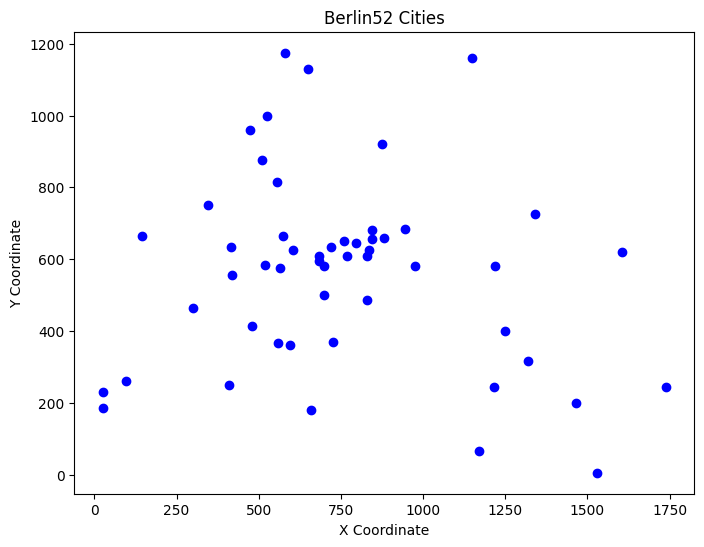

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='berlin52.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='Berlin52 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')

    plot_cities(cities)


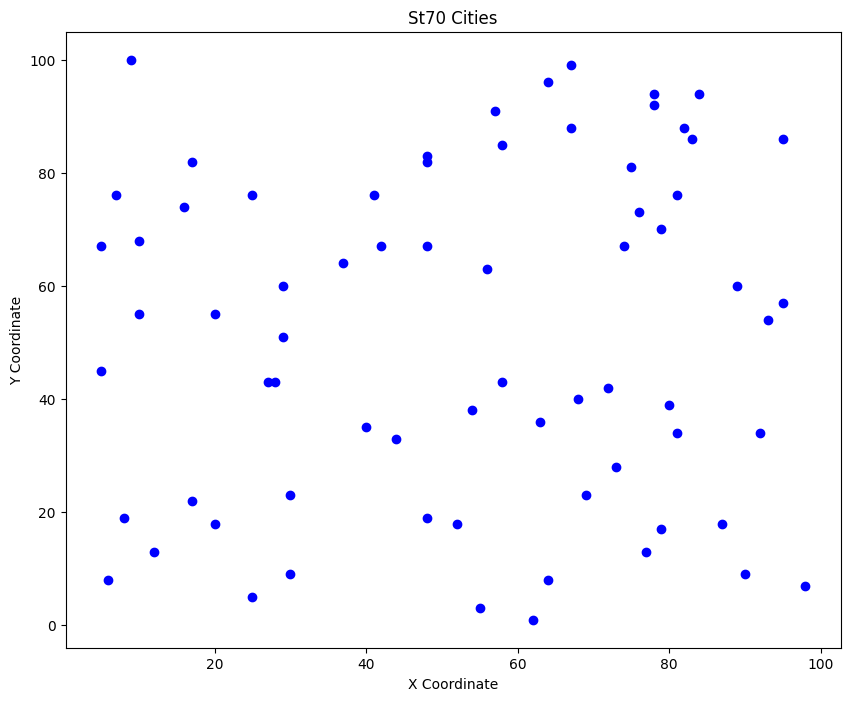

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='st70.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='St70 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('st70.tsp')

    plot_cities(cities)


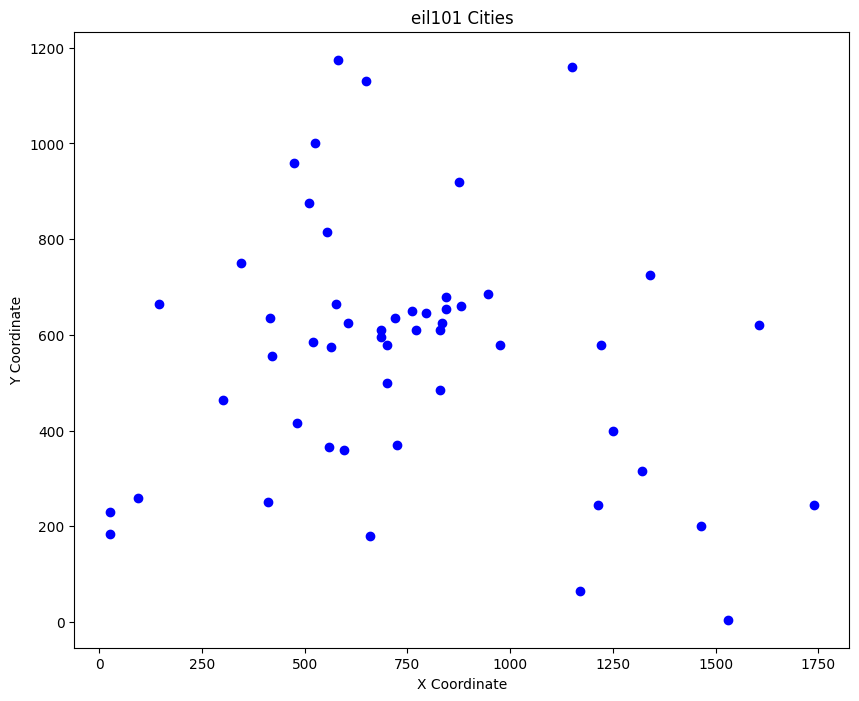

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='eil101.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='eil101 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')

    plot_cities(cities)


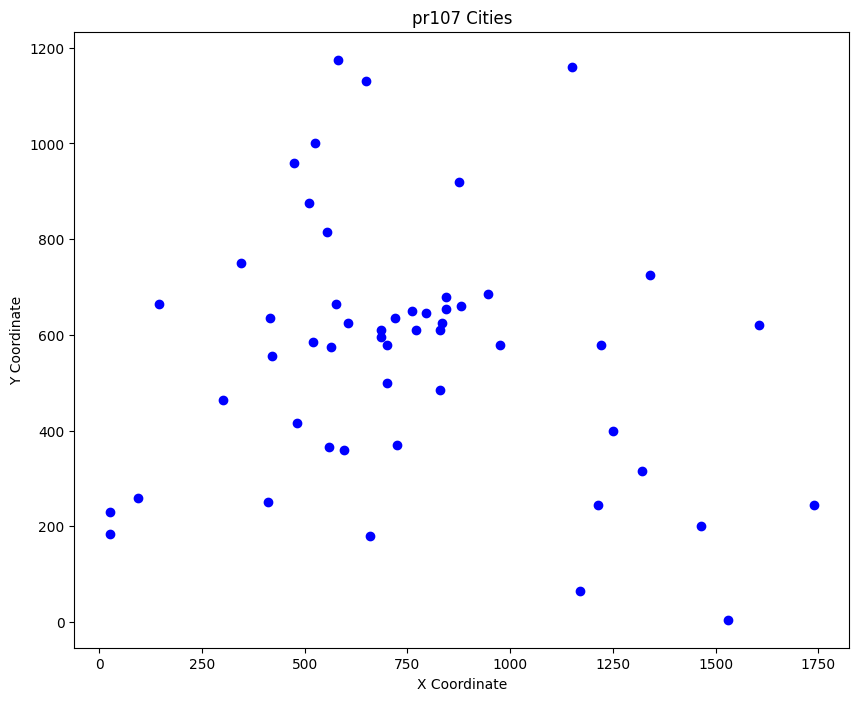

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='pr107.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='pr107 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')

    plot_cities(cities)


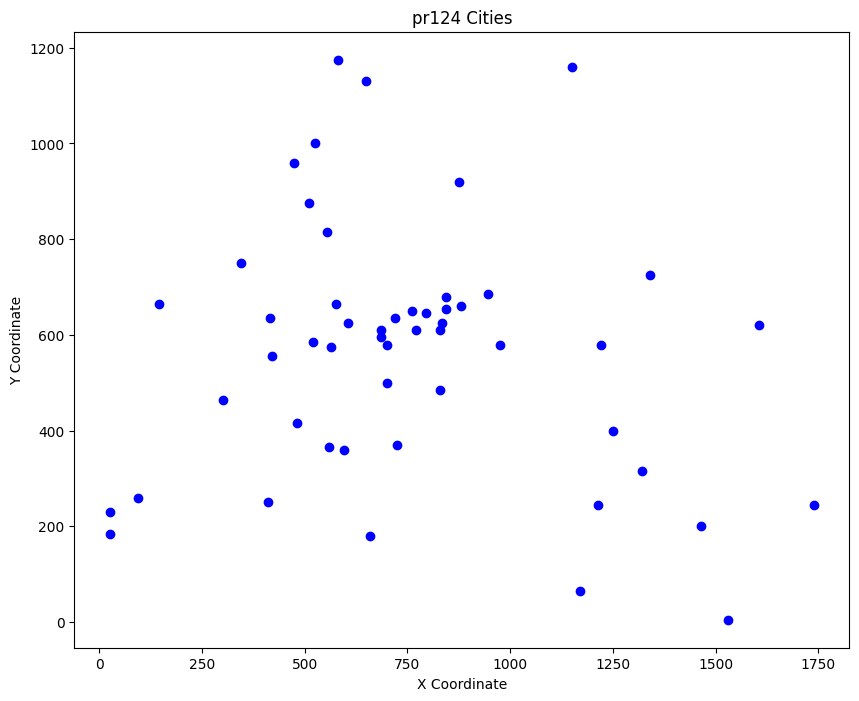

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='pr124.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='pr124 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')

    plot_cities(cities)


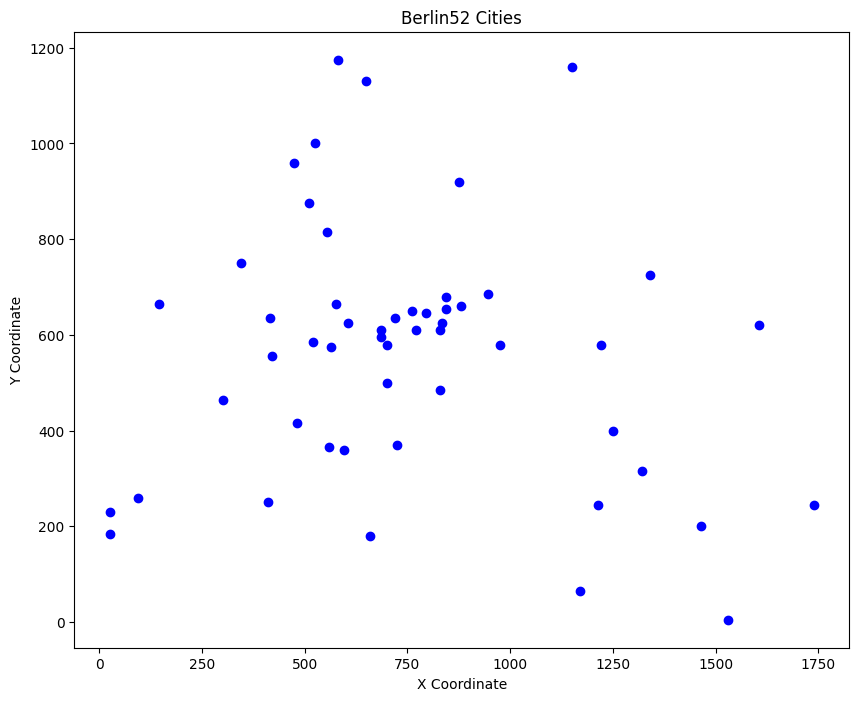

Generation 0: Best Distance = 25308.716354620785
Generation 1: Best Distance = 23960.27890011484
Generation 2: Best Distance = 23521.97410808875
Generation 3: Best Distance = 21626.479149833573
Generation 4: Best Distance = 21626.479149833573
Generation 5: Best Distance = 21626.479149833573
Generation 6: Best Distance = 19898.641886573554
Generation 7: Best Distance = 19045.097861036757
Generation 8: Best Distance = 19045.097861036757
Generation 9: Best Distance = 19045.097861036757
Generation 10: Best Distance = 18838.598743309383
Generation 11: Best Distance = 17768.121319767684
Generation 12: Best Distance = 17028.923563392844
Generation 13: Best Distance = 17028.923563392844
Generation 14: Best Distance = 17028.923563392844
Generation 15: Best Distance = 16830.275345075635
Generation 16: Best Distance = 16830.275345075635
Generation 17: Best Distance = 16210.779019255855
Generation 18: Best Distance = 15524.99027263346
Generation 19: Best Distance = 15524.99027263346
Generation 20:

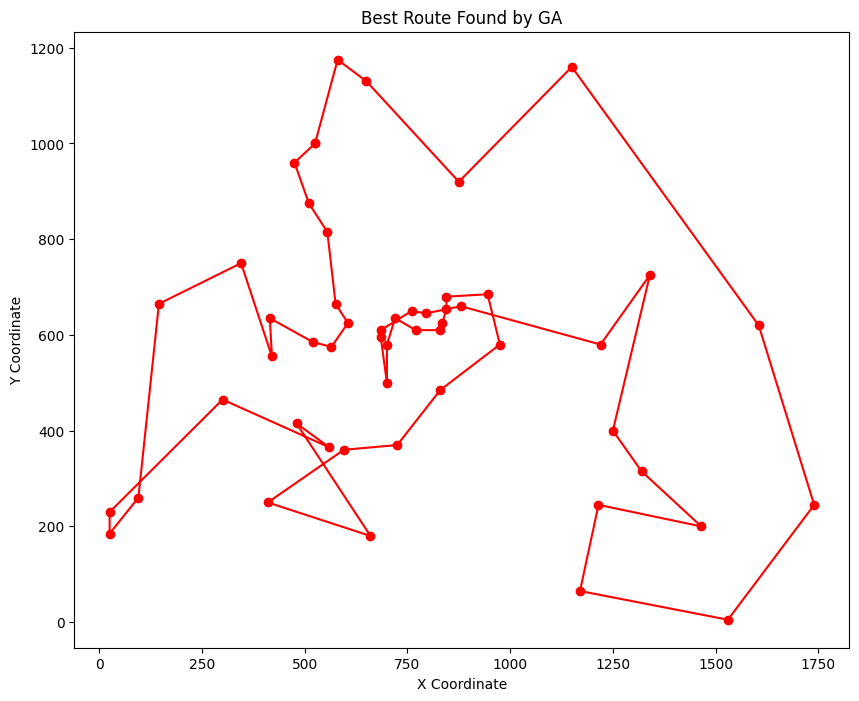

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='berlin52.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='Berlin52 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')

    plot_cities(cities)

# Fitness function: calculate the total distance of a route
def calculate_total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    # To return to the start point
    city1 = cities[route[-1]]
    city2 = cities[route[0]]
    distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Selection: tournament selection
def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament = sorted(tournament, key=lambda route: calculate_total_distance(route, cities))
    return tournament[0]

# Order crossover (OX) operator
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [-1] * size
    offspring[start:end] = parent1[start:end]

    current_pos = end
    for city in parent2:
        if city not in offspring:
            if current_pos == size:
                current_pos = 0
            offspring[current_pos] = city
            current_pos += 1

    return offspring

# Mutation: swap mutation
def swap_mutation(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]

# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))

    for gen in range(generations):
        new_population = []

        # Elitism: keep the best route from the previous generation
        new_population.append(best_route)

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                swap_mutation(offspring)

            new_population.append(offspring)

        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        print(f"Generation {gen}: Best Distance = {calculate_total_distance(best_route, cities)}")

    return best_route

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')
    best_route = genetic_algorithm(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title("Best Route Found by GA")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

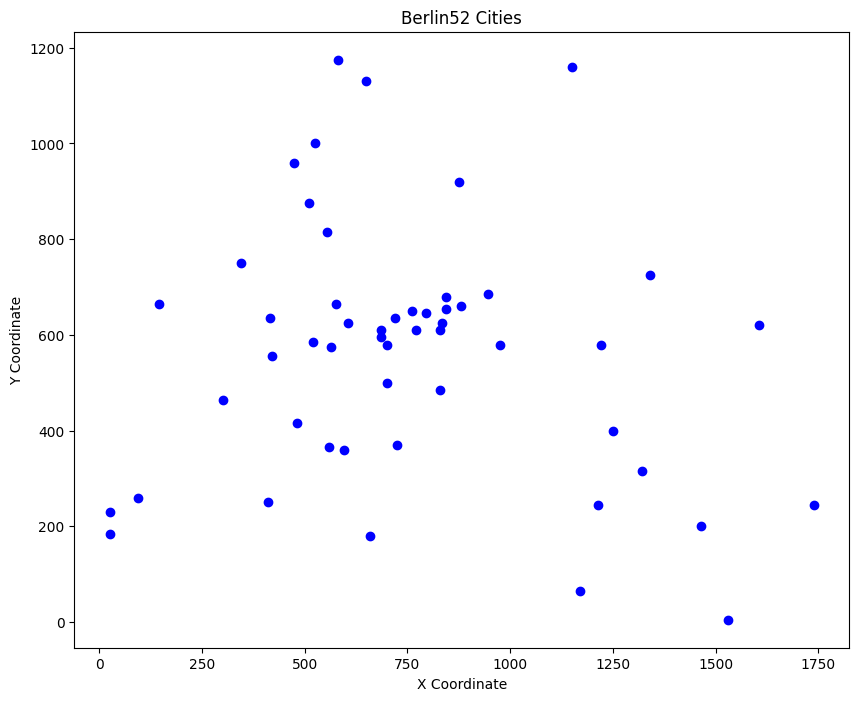

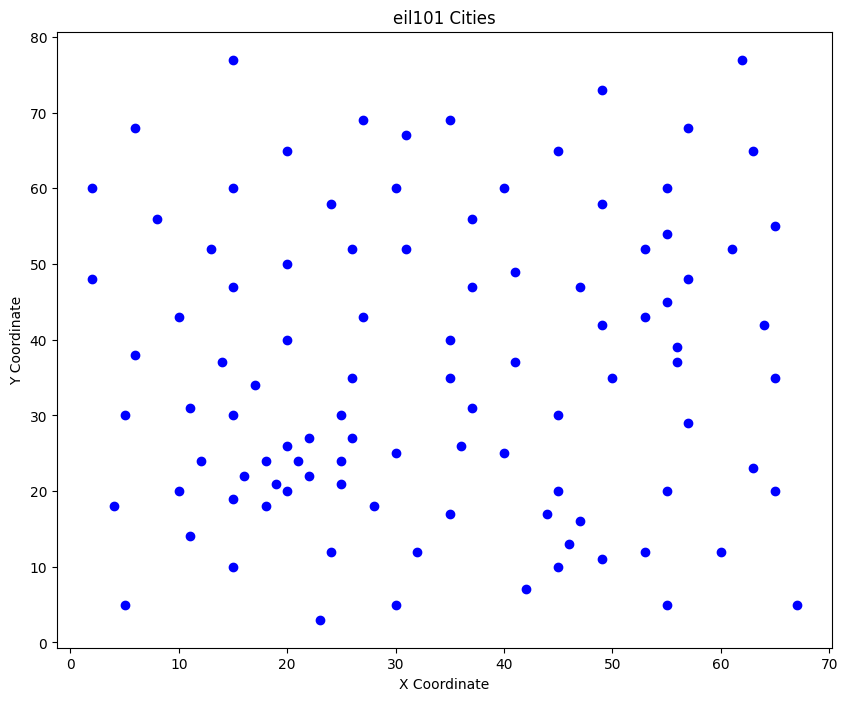

Generation 0: Best Distance = 2999.7823239912695
Generation 1: Best Distance = 2894.8379198217367
Generation 2: Best Distance = 2839.7927517015505
Generation 3: Best Distance = 2839.7927517015505
Generation 4: Best Distance = 2818.2660410107746
Generation 5: Best Distance = 2758.492209532938
Generation 6: Best Distance = 2681.5681468802404
Generation 7: Best Distance = 2597.006369184959
Generation 8: Best Distance = 2597.006369184959
Generation 9: Best Distance = 2597.006369184959
Generation 10: Best Distance = 2506.258843555233
Generation 11: Best Distance = 2501.4259916177666
Generation 12: Best Distance = 2501.268595980263
Generation 13: Best Distance = 2490.9492406597824
Generation 14: Best Distance = 2466.319793677779
Generation 15: Best Distance = 2445.709972305834
Generation 16: Best Distance = 2421.932887123897
Generation 17: Best Distance = 2386.609195737796
Generation 18: Best Distance = 2386.609195737796
Generation 19: Best Distance = 2357.588564428812
Generation 20: Best Di

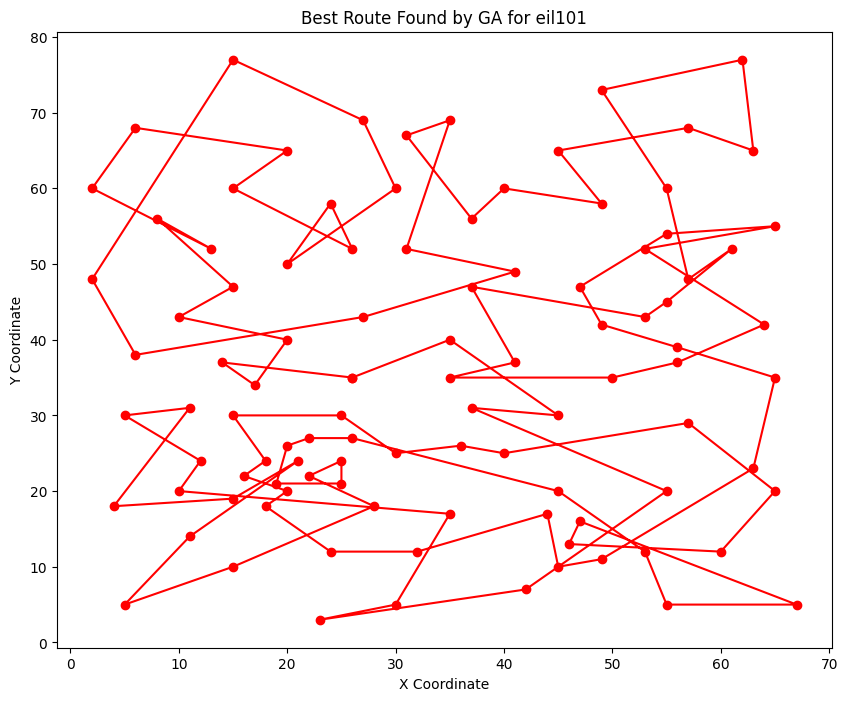

In [ ]:
# Function to load the Berlin52 dataset
def load_berlin52(filename='berlin52.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='Berlin52 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')

    plot_cities(cities)


# Fitness function: calculate the total distance of a route
def calculate_total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    # To return to the start point
    city1 = cities[route[-1]]
    city2 = cities[route[0]]
    distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Selection: tournament selection
def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament = sorted(tournament, key=lambda route: calculate_total_distance(route, cities))
    return tournament[0]

# Order crossover (OX) operator
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [-1] * size
    offspring[start:end] = parent1[start:end]

    current_pos = end
    for city in parent2:
        if city not in offspring:
            if current_pos == size:
                current_pos = 0
            offspring[current_pos] = city
            current_pos += 1

    return offspring

# Mutation: swap mutation
def swap_mutation(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]

# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))

    for gen in range(generations):
        new_population = []

        # Elitism: keep the best route from the previous generation
        new_population.append(best_route)

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                swap_mutation(offspring)

            new_population.append(offspring)

        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        print(f"Generation {gen}: Best Distance = {calculate_total_distance(best_route, cities)}")

    return best_route

if __name__ == "__main__":
    cities = load_berlin52('eil101.tsp')

    plot_cities(cities, title='eil101 Cities')

    best_route = genetic_algorithm(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title("Best Route Found by GA for eil101")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

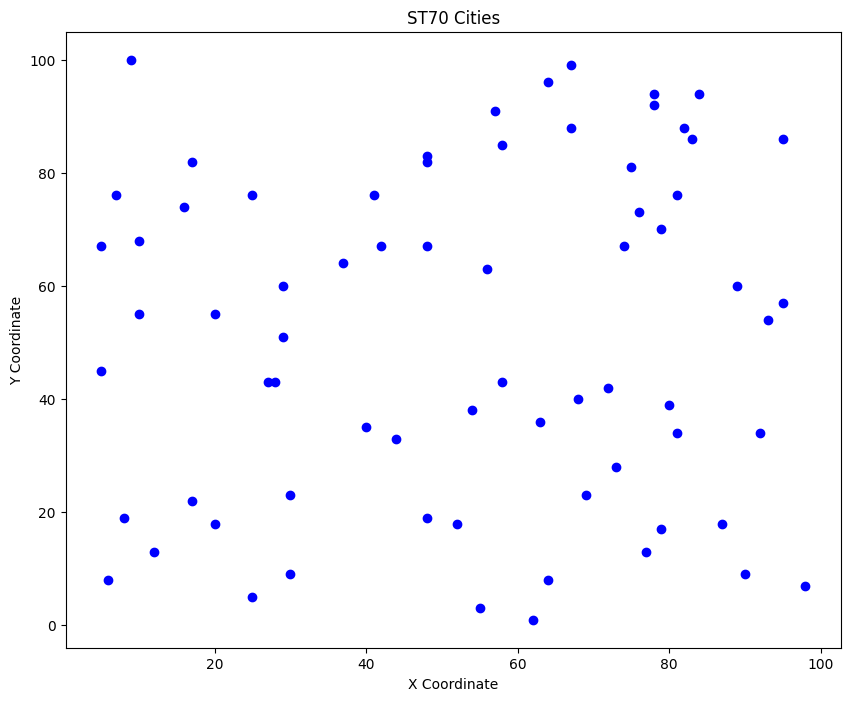

Generation 0: Best Distance = 3070.238392539752
Generation 1: Best Distance = 3070.238392539752
Generation 2: Best Distance = 2948.720132734717
Generation 3: Best Distance = 2917.055832386897
Generation 4: Best Distance = 2865.3382170665773
Generation 5: Best Distance = 2846.87416003003
Generation 6: Best Distance = 2846.87416003003
Generation 7: Best Distance = 2748.6182551337565
Generation 8: Best Distance = 2618.3496549376628
Generation 9: Best Distance = 2618.3496549376628
Generation 10: Best Distance = 2618.3496549376628
Generation 11: Best Distance = 2606.7506009188805
Generation 12: Best Distance = 2571.5613316485333
Generation 13: Best Distance = 2503.859151405969
Generation 14: Best Distance = 2491.068332090482
Generation 15: Best Distance = 2453.569873172721
Generation 16: Best Distance = 2453.569873172721
Generation 17: Best Distance = 2363.575502626116
Generation 18: Best Distance = 2259.325992640032
Generation 19: Best Distance = 2259.325992640032
Generation 20: Best Dista

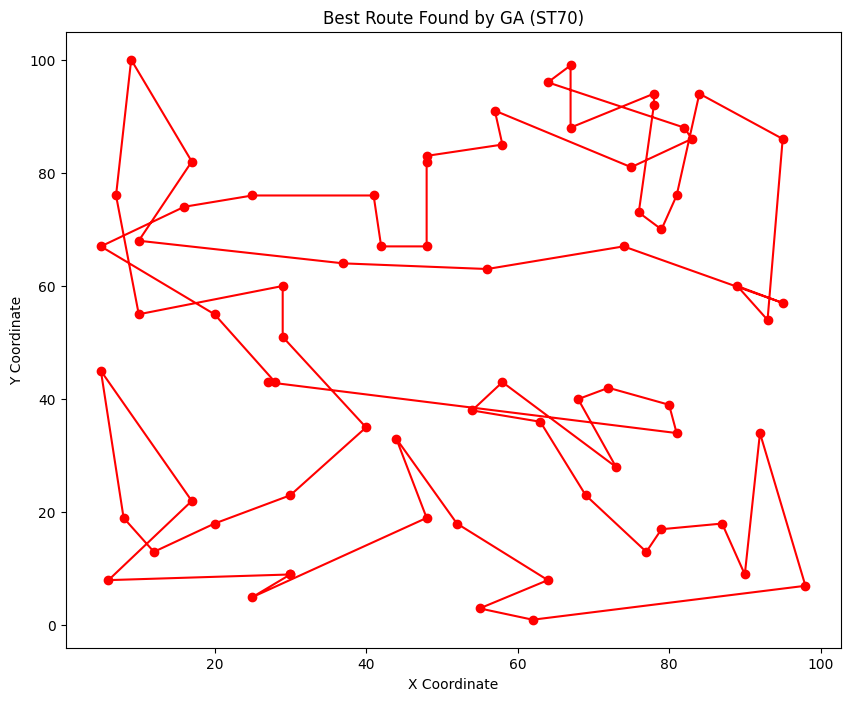

In [ ]:
# Function to load the st70 dataset
def load_st70(filename='st70.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='st70 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Fitness function: calculate the total distance of a route
def calculate_total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    city1 = cities[route[-1]]
    city2 = cities[route[0]]
    distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Selection: tournament selection
def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament = sorted(tournament, key=lambda route: calculate_total_distance(route, cities))
    return tournament[0]

# Order crossover (OX) operator
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [-1] * size
    offspring[start:end] = parent1[start:end]

    current_pos = end
    for city in parent2:
        if city not in offspring:
            if current_pos == size:
                current_pos = 0
            offspring[current_pos] = city
            current_pos += 1

    return offspring

# Mutation: swap mutation
def swap_mutation(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]

# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))

    for gen in range(generations):
        new_population = []

        # Elitism: keep the best route from the previous generation
        new_population.append(best_route)

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                swap_mutation(offspring)

            new_population.append(offspring)

        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        print(f"Generation {gen}: Best Distance = {calculate_total_distance(best_route, cities)}")

    return best_route

if __name__ == "__main__":
    cities = load_st70('st70.tsp')
    plot_cities(cities, title='ST70 Cities')
    best_route = genetic_algorithm(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title("Best Route Found by GA (ST70)")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


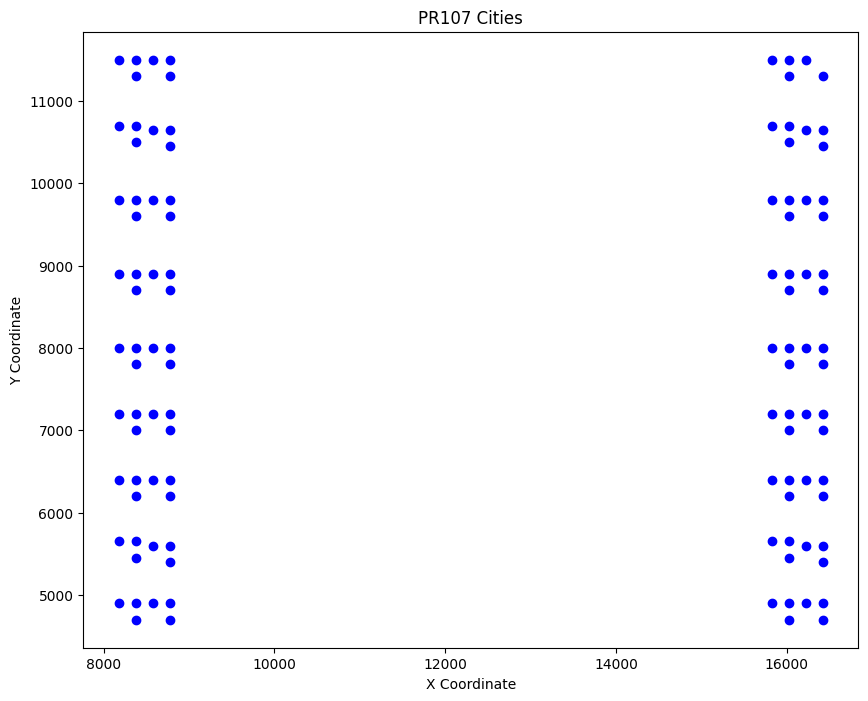

Generation 0: Best Distance = 495237.0221660548
Generation 1: Best Distance = 478631.61008065107
Generation 2: Best Distance = 448631.6428211517
Generation 3: Best Distance = 427379.605712461
Generation 4: Best Distance = 427379.605712461
Generation 5: Best Distance = 416053.4452357615
Generation 6: Best Distance = 410969.67340092314
Generation 7: Best Distance = 401773.2742943978
Generation 8: Best Distance = 401773.2742943978
Generation 9: Best Distance = 401408.80581205257
Generation 10: Best Distance = 390268.9606754857
Generation 11: Best Distance = 390268.9606754857
Generation 12: Best Distance = 376344.05320223694
Generation 13: Best Distance = 373296.36341419484
Generation 14: Best Distance = 373296.36341419484
Generation 15: Best Distance = 358909.8914361848
Generation 16: Best Distance = 350852.1757857286
Generation 17: Best Distance = 350852.1757857286
Generation 18: Best Distance = 343229.25684072624
Generation 19: Best Distance = 343229.25684072624
Generation 20: Best Dist

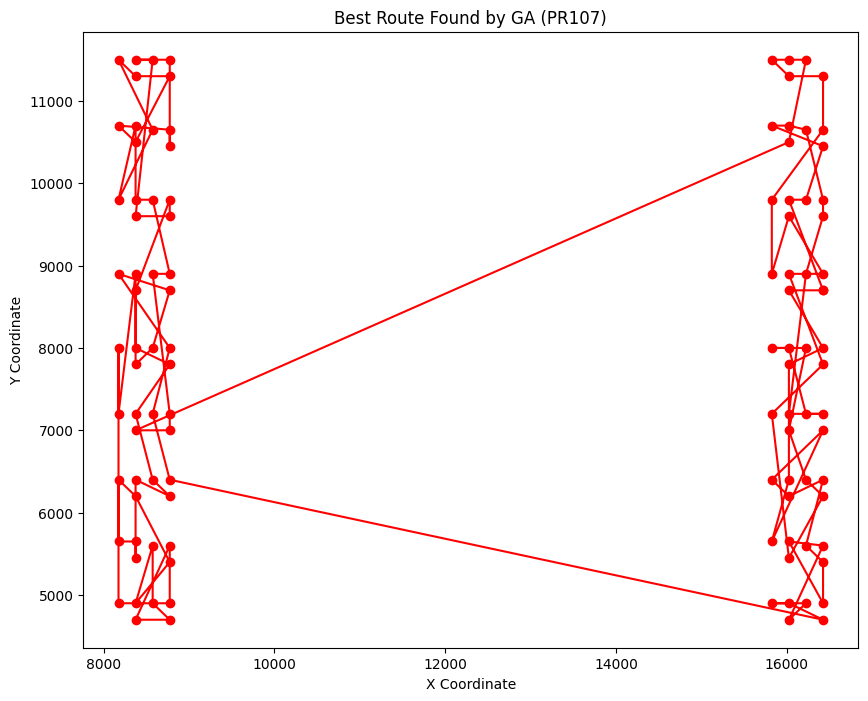

In [ ]:
# Function to load the pr107 dataset
def load_pr107(filename='pr107.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='PR107 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Fitness function: calculate the total distance of a route
def calculate_total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    city1 = cities[route[-1]]
    city2 = cities[route[0]]
    distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Selection: tournament selection
def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament = sorted(tournament, key=lambda route: calculate_total_distance(route, cities))
    return tournament[0]

# Order crossover (OX) operator
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [-1] * size
    offspring[start:end] = parent1[start:end]

    current_pos = end
    for city in parent2:
        if city not in offspring:
            if current_pos == size:
                current_pos = 0
            offspring[current_pos] = city
            current_pos += 1

    return offspring

# Mutation: swap mutation
def swap_mutation(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]

# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))

    for gen in range(generations):
        new_population = []

        # Elitism: keep the best route from the previous generation
        new_population.append(best_route)

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                swap_mutation(offspring)

            new_population.append(offspring)

        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        print(f"Generation {gen}: Best Distance = {calculate_total_distance(best_route, cities)}")

    return best_route

if __name__ == "__main__":
    cities = load_pr107('pr107.tsp')
    plot_cities(cities, title='PR107 Cities')
    best_route = genetic_algorithm(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title("Best Route Found by GA (PR107)")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


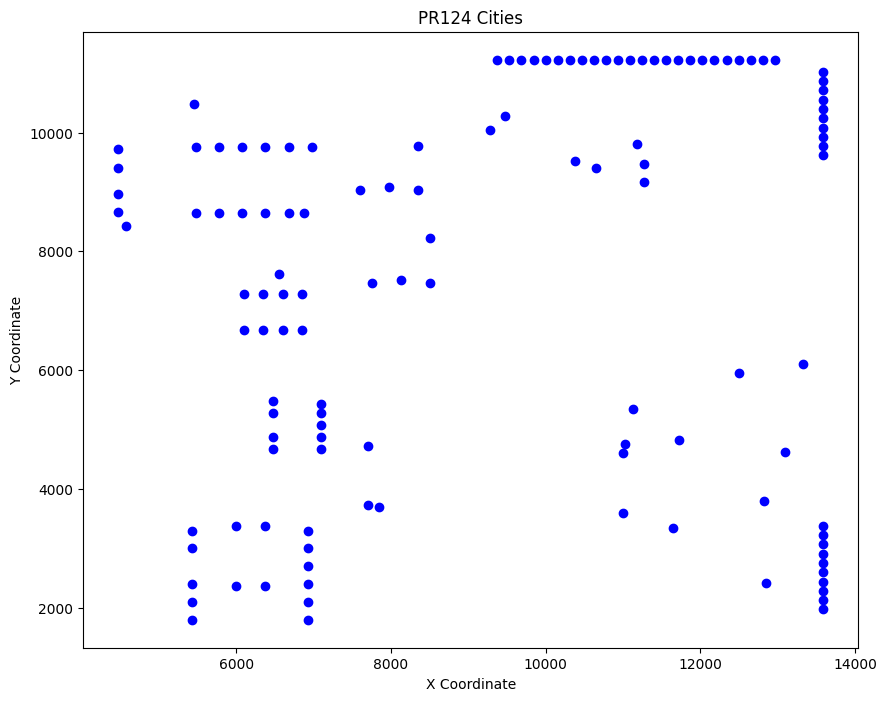

Generation 0: Best Distance = 613324.9402911757
Generation 1: Best Distance = 601605.5603968427
Generation 2: Best Distance = 587486.1780374245
Generation 3: Best Distance = 583762.7190774811
Generation 4: Best Distance = 573106.3894625608
Generation 5: Best Distance = 554041.0699166709
Generation 6: Best Distance = 550150.0789218058
Generation 7: Best Distance = 548744.4819750619
Generation 8: Best Distance = 535004.4223835556
Generation 9: Best Distance = 526181.2652240263
Generation 10: Best Distance = 516630.0730740542
Generation 11: Best Distance = 503900.84285050415
Generation 12: Best Distance = 492934.45986650785
Generation 13: Best Distance = 492934.45986650785
Generation 14: Best Distance = 475729.58334845246
Generation 15: Best Distance = 475729.58334845246
Generation 16: Best Distance = 475729.58334845246
Generation 17: Best Distance = 475729.58334845246
Generation 18: Best Distance = 475729.58334845246
Generation 19: Best Distance = 475729.58334845246
Generation 20: Best D

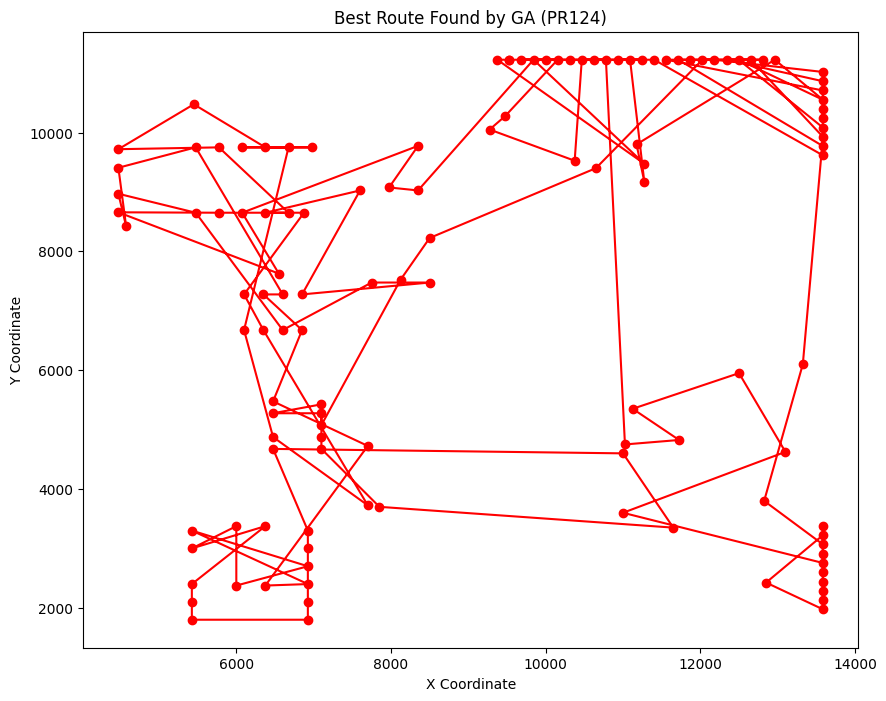

In [ ]:
# Function to load the pr124 dataset
def load_pr124(filename='pr124.tsp'):
    cities = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('NODE_COORD_SECTION'):
                break

        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            cities.append((float(x), float(y)))

    return cities

# Function to plot cities
def plot_cities(cities, title='PR124 Cities'):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c='blue')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Fitness function: calculate the total distance of a route
def calculate_total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    city1 = cities[route[-1]]
    city2 = cities[route[0]]
    distance += np.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)
    return distance

# Initialize population with random routes
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Selection: tournament selection
def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament = sorted(tournament, key=lambda route: calculate_total_distance(route, cities))
    return tournament[0]

# Order crossover (OX) operator
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    offspring = [-1] * size
    offspring[start:end] = parent1[start:end]

    current_pos = end
    for city in parent2:
        if city not in offspring:
            if current_pos == size:
                current_pos = 0
            offspring[current_pos] = city
            current_pos += 1

    return offspring

# Mutation: swap mutation
def swap_mutation(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]

# Main Genetic Algorithm function
def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, tournament_size=3):
    num_cities = len(cities)
    population = initialize_population(pop_size, num_cities)
    best_route = min(population, key=lambda route: calculate_total_distance(route, cities))

    for gen in range(generations):
        new_population = []

        # Elitism: keep the best route from the previous generation
        new_population.append(best_route)

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, cities, tournament_size)
            parent2 = tournament_selection(population, cities, tournament_size)
            offspring = order_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                swap_mutation(offspring)

            new_population.append(offspring)

        population = new_population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, cities))
        best_route = best_route_in_pop

        print(f"Generation {gen}: Best Distance = {calculate_total_distance(best_route, cities)}")

    return best_route

if __name__ == "__main__":
    cities = load_pr124('pr124.tsp')
    plot_cities(cities, title='PR124 Cities')
    best_route = genetic_algorithm(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title("Best Route Found by GA (PR124)")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


Final GA

Generation 0: Best Distance = 7883.64, Diversity = 0.89
Generation 1: Best Distance = 7785.08, Diversity = 1.00
Generation 2: Best Distance = 7748.55, Diversity = 1.00
Generation 3: Best Distance = 7721.30, Diversity = 1.00
Generation 4: Best Distance = 7713.03, Diversity = 1.00
Generation 5: Best Distance = 7713.03, Diversity = 0.99
Generation 6: Best Distance = 7713.03, Diversity = 0.97
Generation 7: Best Distance = 7713.03, Diversity = 0.97
Generation 8: Best Distance = 7713.03, Diversity = 0.96
Generation 9: Best Distance = 7713.03, Diversity = 0.93
Generation 10: Best Distance = 7713.03, Diversity = 0.93
Generation 11: Best Distance = 7713.03, Diversity = 0.89
Generation 12: Best Distance = 7713.03, Diversity = 0.79
Generation 13: Best Distance = 7713.03, Diversity = 0.70
Generation 14: Best Distance = 7713.03, Diversity = 0.50
Generation 15: Best Distance = 7713.03, Diversity = 0.28
Generation 16: Best Distance = 7713.03, Diversity = 0.10
Generation 17: Best Distance = 7713.03, D

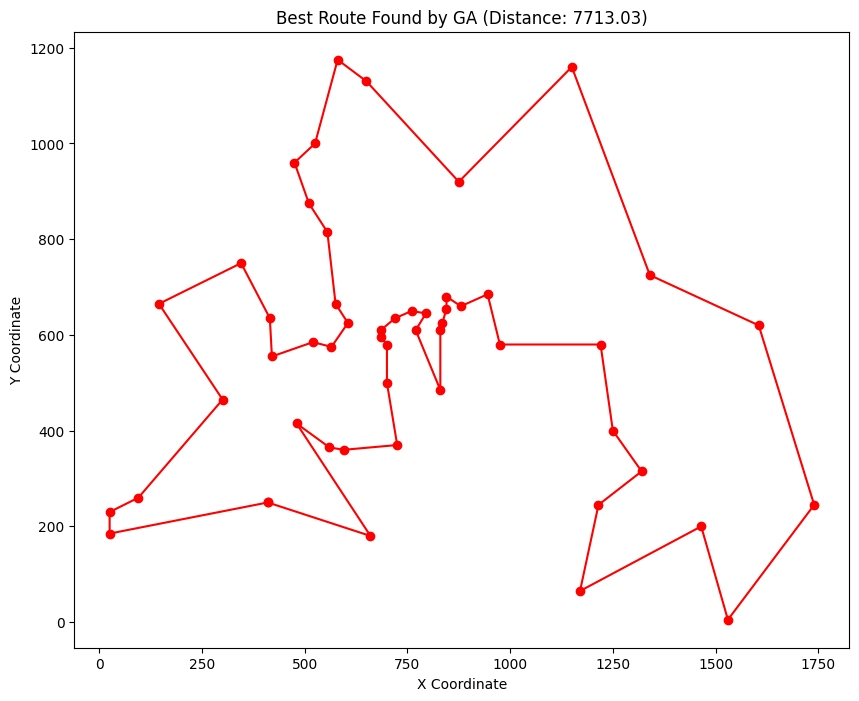

In [ ]:
# Fitness function using a precomputed distance matrix
def calculate_total_distance(route, distance_matrix):
    distance = sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
    distance += distance_matrix[route[-1], route[0]]
    return distance

# Precompute distance matrix
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            dist_matrix[i, j] = np.linalg.norm(np.array(cities[i]) - np.array(cities[j]))
    return dist_matrix

# Initialize population with greedy and random routes
def initialize_population(cities, pop_size, dr_fraction=0.3):
    num_cities = len(cities)
    num_greedy = int(pop_size * dr_fraction)
    population = []

    # Greedy Initialization: Nearest Neighbor
    def nearest_neighbor_route(start_city):
        unvisited = list(range(num_cities))
        unvisited.remove(start_city)
        route = [start_city]
        while unvisited:
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(np.array(cities[route[-1]]) - np.array(cities[city])))
            route.append(nearest_city)
            unvisited.remove(nearest_city)
        return route

    # Add greedy routes
    for _ in range(num_greedy):
        start_city = random.randint(0, num_cities - 1)
        population.append(nearest_neighbor_route(start_city))

    # Add random routes
    for _ in range(pop_size - num_greedy):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)

    return population

# Calculate population diversity
def calculate_diversity(population):
    unique_routes = set(tuple(route) for route in population)
    return len(unique_routes) / len(population)

# Rank-based selection
def rank_based_selection(population, distance_matrix):
    fitness = [(route, 1 / calculate_total_distance(route, distance_matrix)) for route in population]
    fitness.sort(key=lambda x: x[1], reverse=True)
    ranks = np.arange(len(fitness), 0, -1)
    probabilities = ranks / ranks.sum()
    selected_index = np.random.choice(len(population), p=probabilities)
    return fitness[selected_index][0]

# Partially Matched Crossover (PMX)
def pmx_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size

    # Copy segment from parent1
    child[start:end] = parent1[start:end]

    # Map remaining values from parent2
    for i in range(start, end):
        if parent2[i] not in child:
            idx = i
            while child[idx] != -1:
                idx = parent2.index(parent1[idx])
            child[idx] = parent2[i]

    for i in range(size):
        if child[i] == -1:
            child[i] = parent2[i]

    return child

# 2-opt local optimization
def two_opt(route, distance_matrix):
    best_distance = calculate_total_distance(route, distance_matrix)
    best_route = route[:]
    for i in range(len(route) - 1):
        for j in range(i + 1, len(route)):
            new_route = route[:]
            new_route[i:j] = reversed(new_route[i:j])
            new_distance = calculate_total_distance(new_route, distance_matrix)
            if new_distance < best_distance:
                best_distance = new_distance
                best_route = new_route
    return best_route

# Hybrid mutation
def hybrid_mutation(route, mutation_rate=0.05):
    if random.random() < mutation_rate:
        # Swap mutation
        idx1, idx2 = random.sample(range(len(route)), 2)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    if random.random() < mutation_rate:
        # Inversion mutation
        start, end = sorted(random.sample(range(len(route)), 2))
        route[start:end] = reversed(route[start:end])

# Main Genetic Algorithm
def genetic_algorithm(cities, pop_size=100, generations=1000, mutation_rate=0.01, dr_fraction=0.3, early_stop=50, elitism_rate=0.05):
    num_cities = len(cities)
    distance_matrix = calculate_distance_matrix(cities)
    population = initialize_population(cities, pop_size, dr_fraction)
    best_route = min(population, key=lambda route: calculate_total_distance(route, distance_matrix))
    best_distance = calculate_total_distance(best_route, distance_matrix)

    no_improve = 0

    for gen in range(generations):
        new_population = []

        # Elitism
        elite_size = int(pop_size * elitism_rate)
        elite = sorted(population, key=lambda route: calculate_total_distance(route, distance_matrix))[:elite_size]
        new_population.extend(elite)

        # Adjust crossover probability based on diversity
        diversity = calculate_diversity(population)
        crossover_probability = 0.9 if diversity > 0.8 else 0.6

        # Adaptive mutation rate
        if no_improve >= 10:
            mutation_rate = min(mutation_rate * 1.5, 0.5)
        else:
            mutation_rate = max(mutation_rate * 0.9, 0.01)

        # Generate new population
        while len(new_population) < pop_size:
            parent1 = rank_based_selection(population, distance_matrix)
            parent2 = rank_based_selection(population, distance_matrix)
            if random.random() < crossover_probability:
                offspring = pmx_crossover(parent1, parent2)
                hybrid_mutation(offspring, mutation_rate)
                new_population.append(offspring)

        population = new_population

        # Apply 2-opt local search to the top solutions
        for i in range(elite_size):
            population[i] = two_opt(population[i], distance_matrix)

        # Evaluate the best route in the new population
        best_route_in_pop = min(population, key=lambda route: calculate_total_distance(route, distance_matrix))
        best_distance_in_pop = calculate_total_distance(best_route_in_pop, distance_matrix)

        if best_distance_in_pop < best_distance:
            best_route, best_distance = best_route_in_pop, best_distance_in_pop
            no_improve = 0
        else:
            no_improve += 1

        print(f"Generation {gen}: Best Distance = {best_distance:.2f}, Diversity = {diversity:.2f}")

        if no_improve >= early_stop:
            print(f"Early stopping triggered at generation {gen}.")
            break

    return best_route, best_distance

if __name__ == "__main__":
    cities = load_berlin52('berlin52.tsp')
    best_route, best_distance = genetic_algorithm(cities)

    x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
    y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

    plt.figure(figsize=(10, 8))
    plt.plot(x_coords, y_coords, 'r-o')
    plt.title(f"Best Route Found by GA (Distance: {best_distance:.2f})")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()



Running GA on Berlin52
Generation 0: Best Distance = 7883.64, Diversity = 0.91
Generation 1: Best Distance = 7802.32, Diversity = 0.99
Generation 2: Best Distance = 7748.55, Diversity = 0.98
Generation 3: Best Distance = 7721.30, Diversity = 0.99
Generation 4: Best Distance = 7713.03, Diversity = 0.99
Generation 5: Best Distance = 7713.03, Diversity = 0.99
Generation 6: Best Distance = 7713.03, Diversity = 0.99
Generation 7: Best Distance = 7713.03, Diversity = 0.98
Generation 8: Best Distance = 7713.03, Diversity = 0.98
Generation 9: Best Distance = 7713.03, Diversity = 0.96
Generation 10: Best Distance = 7713.03, Diversity = 0.91
Generation 11: Best Distance = 7713.03, Diversity = 0.92
Generation 12: Best Distance = 7713.03, Diversity = 0.91
Generation 13: Best Distance = 7713.03, Diversity = 0.91
Generation 14: Best Distance = 7713.03, Diversity = 0.91
Generation 15: Best Distance = 7713.03, Diversity = 0.78
Generation 16: Best Distance = 7713.03, Diversity = 0.75
Generation 17: Be

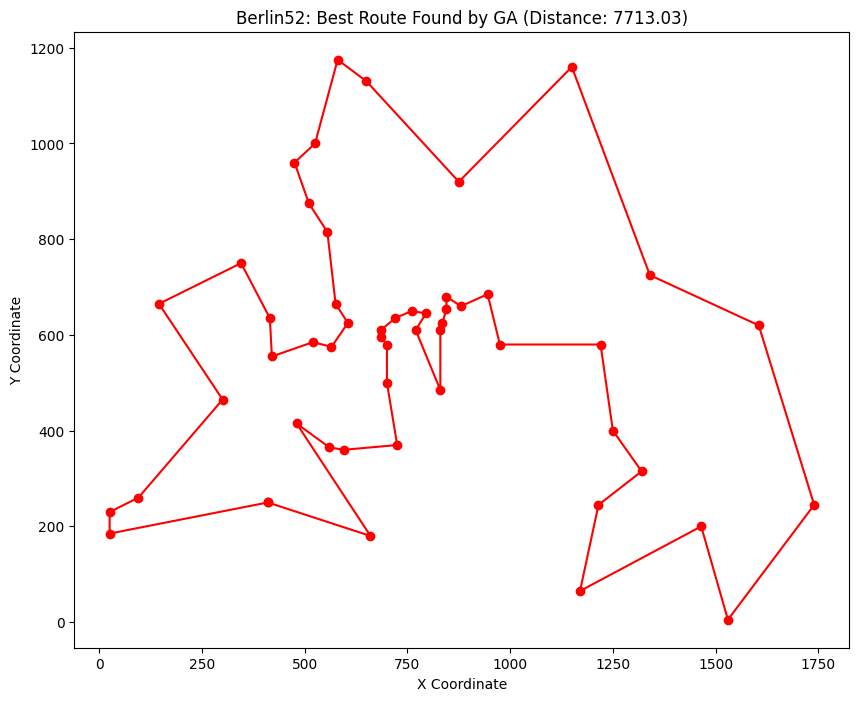


Running GA on ST70
Generation 0: Best Distance = 764.56, Diversity = 0.95
Generation 1: Best Distance = 751.73, Diversity = 1.00
Generation 2: Best Distance = 743.55, Diversity = 1.00
Generation 3: Best Distance = 733.24, Diversity = 1.00
Generation 4: Best Distance = 724.37, Diversity = 1.00
Generation 5: Best Distance = 715.62, Diversity = 0.99
Generation 6: Best Distance = 705.29, Diversity = 1.00
Generation 7: Best Distance = 696.57, Diversity = 1.00
Generation 8: Best Distance = 694.59, Diversity = 1.00
Generation 9: Best Distance = 693.62, Diversity = 1.00
Generation 10: Best Distance = 692.73, Diversity = 0.99
Generation 11: Best Distance = 692.04, Diversity = 0.98
Generation 12: Best Distance = 691.41, Diversity = 0.98
Generation 13: Best Distance = 691.08, Diversity = 0.97
Generation 14: Best Distance = 691.08, Diversity = 0.96
Generation 15: Best Distance = 691.08, Diversity = 0.92
Generation 16: Best Distance = 691.08, Diversity = 0.85
Generation 17: Best Distance = 691.08,

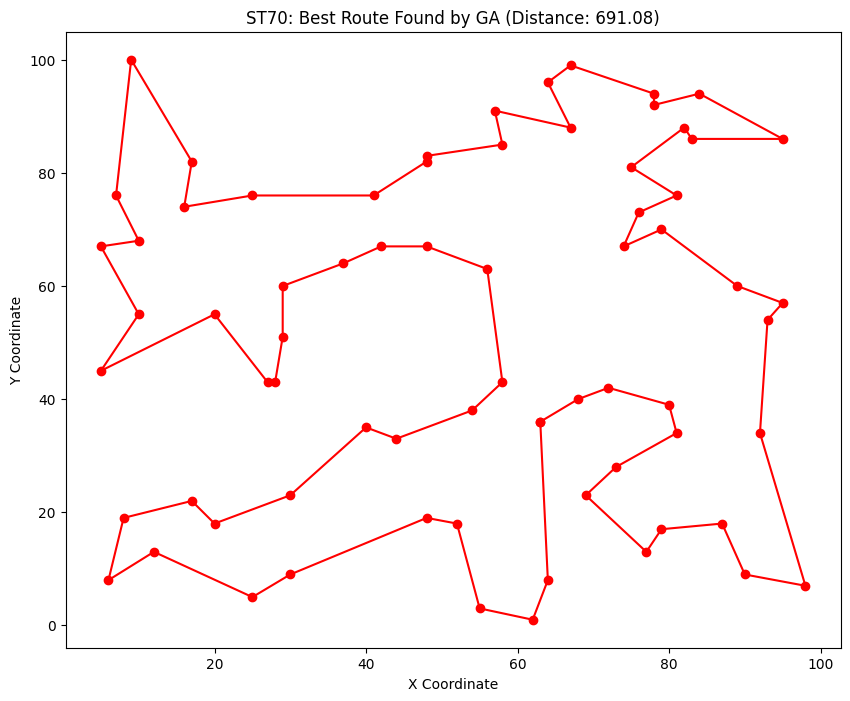


Running GA on EIL101
Generation 0: Best Distance = 743.97, Diversity = 0.97
Generation 1: Best Distance = 733.89, Diversity = 1.00
Generation 2: Best Distance = 723.87, Diversity = 1.00
Generation 3: Best Distance = 712.86, Diversity = 1.00
Generation 4: Best Distance = 704.64, Diversity = 1.00
Generation 5: Best Distance = 696.83, Diversity = 1.00
Generation 6: Best Distance = 690.98, Diversity = 1.00
Generation 7: Best Distance = 685.44, Diversity = 1.00
Generation 8: Best Distance = 677.68, Diversity = 1.00
Generation 9: Best Distance = 674.87, Diversity = 1.00
Generation 10: Best Distance = 672.16, Diversity = 1.00
Generation 11: Best Distance = 669.83, Diversity = 1.00
Generation 12: Best Distance = 662.13, Diversity = 1.00
Generation 13: Best Distance = 660.86, Diversity = 1.00
Generation 14: Best Distance = 659.62, Diversity = 1.00
Generation 15: Best Distance = 659.06, Diversity = 1.00
Generation 16: Best Distance = 658.75, Diversity = 1.00
Generation 17: Best Distance = 658.7

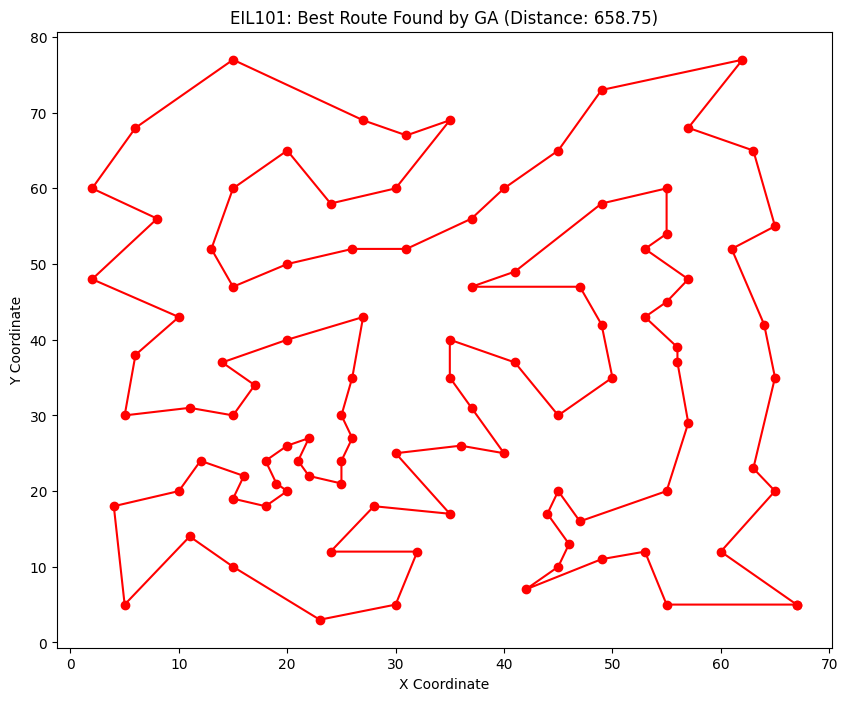


Running GA on PR107
Generation 0: Best Distance = 46597.68, Diversity = 0.96
Generation 1: Best Distance = 46359.86, Diversity = 0.99
Generation 2: Best Distance = 46089.93, Diversity = 0.99
Generation 3: Best Distance = 45953.63, Diversity = 0.99
Generation 4: Best Distance = 45789.13, Diversity = 0.99
Generation 5: Best Distance = 45659.07, Diversity = 0.99
Generation 6: Best Distance = 45541.91, Diversity = 0.99
Generation 7: Best Distance = 45424.76, Diversity = 0.99
Generation 8: Best Distance = 45307.60, Diversity = 0.99
Generation 9: Best Distance = 45190.44, Diversity = 0.98
Generation 10: Best Distance = 45073.29, Diversity = 0.97
Generation 11: Best Distance = 44959.17, Diversity = 0.99
Generation 12: Best Distance = 44904.34, Diversity = 0.98
Generation 13: Best Distance = 44849.51, Diversity = 0.98
Generation 14: Best Distance = 44799.12, Diversity = 0.98
Generation 15: Best Distance = 44799.12, Diversity = 0.98
Generation 16: Best Distance = 44799.12, Diversity = 0.96
Gen

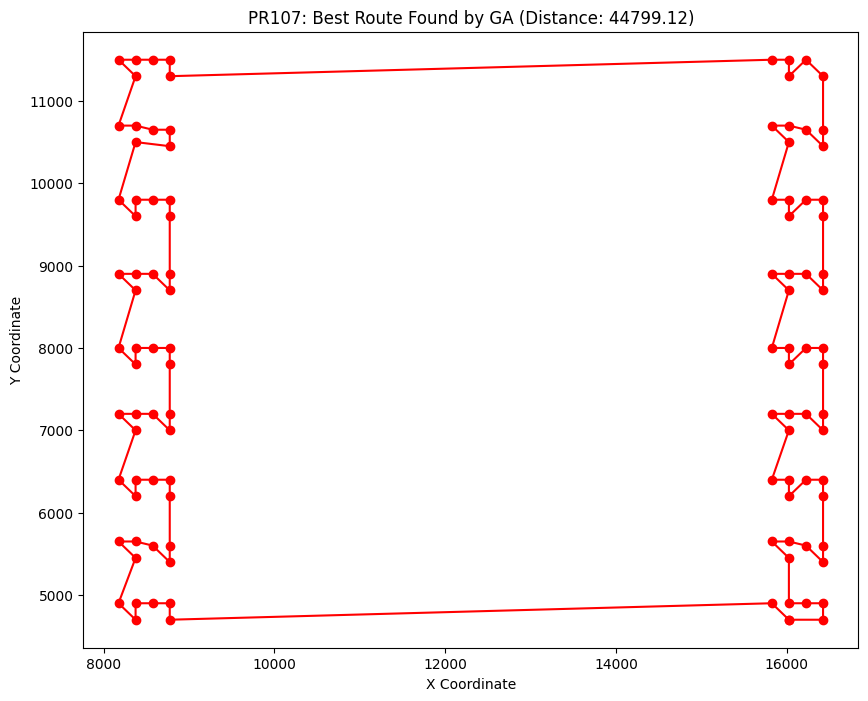


Running GA on PR124
Generation 0: Best Distance = 64039.20, Diversity = 0.97
Generation 1: Best Distance = 62951.58, Diversity = 0.99
Generation 2: Best Distance = 62515.07, Diversity = 0.99
Generation 3: Best Distance = 62114.94, Diversity = 0.99
Generation 4: Best Distance = 61733.48, Diversity = 0.99
Generation 5: Best Distance = 61371.11, Diversity = 0.99
Generation 6: Best Distance = 61073.04, Diversity = 0.99
Generation 7: Best Distance = 60798.36, Diversity = 0.99
Generation 8: Best Distance = 60542.74, Diversity = 0.99
Generation 9: Best Distance = 60326.20, Diversity = 0.99
Generation 10: Best Distance = 60173.80, Diversity = 0.98
Generation 11: Best Distance = 60076.84, Diversity = 0.99
Generation 12: Best Distance = 59990.48, Diversity = 0.99
Generation 13: Best Distance = 59990.48, Diversity = 0.99
Generation 14: Best Distance = 59990.48, Diversity = 0.97
Generation 15: Best Distance = 59990.48, Diversity = 0.93
Generation 16: Best Distance = 59990.48, Diversity = 0.96
Gen

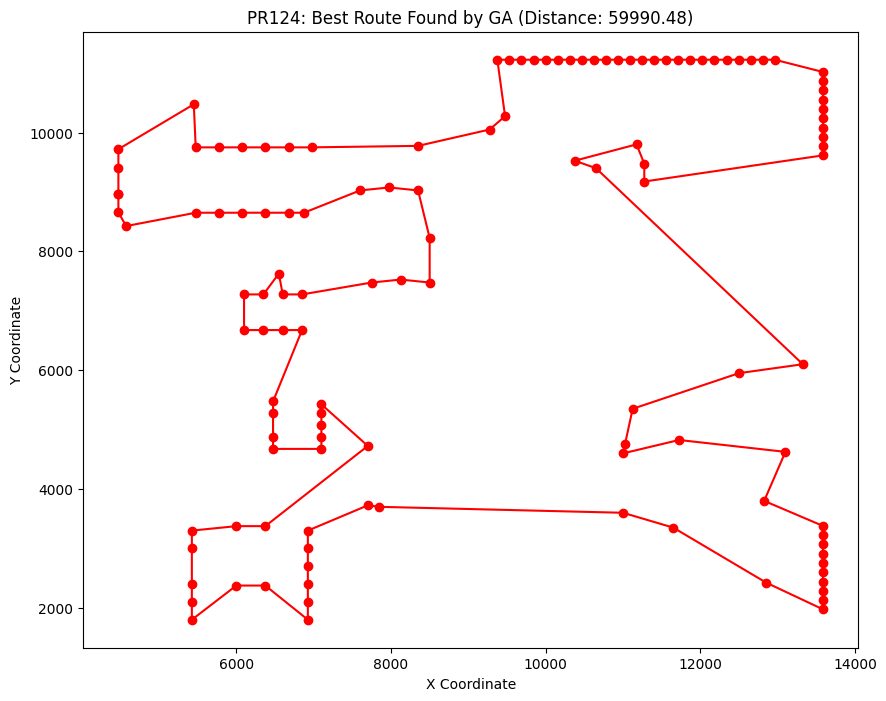


Summary of Results:
Berlin52: Best Distance = 7713.03
ST70: Best Distance = 691.08
EIL101: Best Distance = 658.75
PR107: Best Distance = 44799.12
PR124: Best Distance = 59990.48


In [ ]:
# Function to run GA on multiple datasets
def run_ga_on_datasets(datasets):
    results = {}

    for dataset_name, dataset_file in datasets.items():
        print(f"\nRunning GA on {dataset_name}")
        cities = load_berlin52(dataset_file)
        best_route, best_distance = genetic_algorithm(cities)

        results[dataset_name] = best_distance

        # Plot the best route
        x_coords = [cities[city][0] for city in best_route] + [cities[best_route[0]][0]]
        y_coords = [cities[city][1] for city in best_route] + [cities[best_route[0]][1]]

        plt.figure(figsize=(10, 8))
        plt.plot(x_coords, y_coords, 'r-o')
        plt.title(f"{dataset_name}: Best Route Found by GA (Distance: {best_distance:.2f})")
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()

    return results

if __name__ == "__main__":
    datasets = {
        "Berlin52": "berlin52.tsp",
        "ST70": "st70.tsp",
        "EIL101": "eil101.tsp",
        "PR107": "pr107.tsp",
        "PR124": "pr124.tsp"
    }

    results = run_ga_on_datasets(datasets)

    print("\nSummary of Results:")
    for dataset, distance in results.items():
        print(f"{dataset}: Best Distance = {distance:.2f}")
